In [148]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [149]:
conda install python-graphviz


Note: you may need to restart the kernel to use updated packages.Collecting package metadata (current_repodata.json): ...working... done
Solving environment: ...working... done

# All requested packages already installed.






==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.2




In [150]:
%pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [151]:
from six import StringIO
import pydotplus

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import joblib
import graphviz

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, cross_validate
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

### Logistic Regression: 
Logistic regression is a linear model commonly used for binary classification but can also be extended to multi-class classification using techniques like one-vs-rest or softmax regression.

### Naive Bayes: 
Naive Bayes is a probabilistic classifier that assumes independence between features. It is simple and efficient, often used for text classification and other tasks.

### Decision Trees: 
Decision trees recursively split the data based on features to make predictions. They are easy to understand and interpret but can be prone to overfitting.

### Random Forest: 
Random forest is an ensemble model that combines multiple decision trees. It improves performance by reducing overfitting and capturing more complex relationships in the data.

### Gradient Boosting: 
Gradient boosting algorithms, such as XGBoost or LightGBM, sequentially train weak learners and combine their predictions. They can handle complex interactions and perform well in various domains.

### Support Vector Machines (SVM): 
SVMs find a hyperplane that maximally separates the classes. They can handle non-linear decision boundaries using kernel functions.

### Neural Networks: 
Neural networks, including deep learning models, can capture complex patterns in data. They consist of multiple layers of interconnected nodes (neurons) and are capable of learning intricate relationships but require more computational resources and data.

In [153]:
# Load the DataFrame from the file
with open('flight_df.pickle', 'rb') as file:
    flight_df = pickle.load(file)

In [154]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308253 entries, 5680782 to 3397334
Data columns (total 29 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   MONTH                                     308253 non-null  int64  
 1   DAY_OF_WEEK                               308253 non-null  int64  
 2   DEP_DELAY_NEW                             308253 non-null  float64
 3   DEP_TIME_BLK                              308253 non-null  object 
 4   DISTANCE                                  308253 non-null  float64
 5   SEGMENT_NUMBER                            308253 non-null  int64  
 6   CONCURRENT_FLIGHTS                        308253 non-null  int64  
 7   NUMBER_OF_SEATS                           308253 non-null  int64  
 8   CARRIER_NAME                              308253 non-null  object 
 9   AIRPORT_FLIGHTS_MONTH                     308253 non-null  int64  
 10  AIRLINE_FLIGH

In [155]:
category_counts = flight_df['Delay Category'].value_counts()
category_counts

No Delay       102751
Minor Delay    102751
Long Delay     102751
Name: Delay Category, dtype: int64

# Transforming the Columns into insertable features

In [156]:
# Select object columns
object_columns = flight_df.select_dtypes(include='object').columns

# Display info for object columns only
flight_df[object_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308253 entries, 5680782 to 3397334
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DEP_TIME_BLK       308253 non-null  object
 1   CARRIER_NAME       308253 non-null  object
 2   DEPARTING_AIRPORT  308253 non-null  object
 3   PREVIOUS_AIRPORT   308253 non-null  object
 4   Delay Category     308253 non-null  object
dtypes: object(5)
memory usage: 14.1+ MB


In [157]:
# Select the columns to be one-hot encoded
columns_to_encode = ['MONTH', 'DAY_OF_WEEK', 'DEP_TIME_BLK', 'CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT', ]

In [158]:
# Perform one-hot encoding using pandas get_dummies function
df_encoded = pd.get_dummies(flight_df, columns=columns_to_encode)

In [159]:
df_encoded

DEP_DELAY_NEW  DISTANCE  SEGMENT_NUMBER  CONCURRENT_FLIGHTS  \
5680782            0.0     689.0               3                  50   
6376220            0.0    1846.0               1                  66   
6229419            0.0     214.0               2                  55   
6164851            0.0     691.0               6                  70   
3300280            0.0    1199.0               3                  74   
...                ...       ...             ...                 ...   
6325773           90.0     113.0               1                  33   
1908682          163.0     689.0               2                  63   
3292967           73.0     760.0               2                  84   
2107710           35.0     175.0               6                  71   
3397334           72.0     612.0               3                  59   

         NUMBER_OF_SEATS  AIRPORT_FLIGHTS_MONTH  AIRLINE_FLIGHTS_MONTH  \
5680782              157                  31151                  79989   
6376220              160                  27188                  79228   
6229419              180                  32251                  81498   
6164851               79                  25322                  18545   
3300280               76                  35086                  26909   
...                  ...                    ...                    ...   
6325773               44                  25322                  26721   
1908682              158                  32678                  81803   
3292967              199                  35086                  90457   
2107710              140                  25360                  78894   
3397334              124                  29376                  55374   

         AIRLINE_AIRPORT_FLIGHTS_MONTH  AVG_MONTHLY_PASS_AIRPORT  \
5680782                          19506                   4365661   
6376220                           5350                   3103410   
6229419                          19689                   4365661   
6164851                           3234                   2907365   
3300280                            544                   4365661   
...                                ...                       ...   
6325773                           5416                   2907365   
1908682                          20473                   4365661   
3292967                          21769                   4365661   
2107710                          12702                   2907365   
3397334                           6976                   3103410   

         AVG_MONTHLY_PASS_AIRLINE  ...  PREVIOUS_AIRPORT_Westchester County  \
5680782                  12460183  ...                                    0   
6376220                  11744595  ...                                    0   
6229419                  12460183  ...                                    0   
6164851                   1191889  ...                                    0   
3300280                   1529740  ...                                    0   
...                           ...  ...                                  ...   
6325773                   1204766  ...                                    0   
1908682                  12460183  ...                                    0   
3292967                  12460183  ...                                    0   
2107710                  11744595  ...                                    0   
3397334                   8501631  ...                                    0   

         PREVIOUS_AIRPORT_Wichita Mid-Continent  \
5680782                                       0   
6376220                                       0   
6229419                                       0   
6164851                                       0   
3300280                                       0   
...                                         ...   
6325773                                       0   
1908682                                       0   
3292967                       

In [160]:
# Select object columns from the encoded DataFrame
object_columns = df_encoded.select_dtypes(include='object').columns

# Display info for object columns only
df_encoded[object_columns].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308253 entries, 5680782 to 3397334
Data columns (total 1 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   Delay Category  308253 non-null  object
dtypes: object(1)
memory usage: 4.7+ MB


In [161]:
# Separate the target variable (y) and the feature matrix (X)
X = df_encoded.drop(['Delay Category', 'DEP_DELAY_NEW'], axis=1)
y = df_encoded['Delay Category']

In [162]:
# Display the feature matrix (X) and target variable (y)
print("Feature Matrix (X):")
print(X.head())

print("\nTarget Variable (y):")
print(y.head())

Feature Matrix (X):
         DISTANCE  SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  \
5680782     689.0               3                  50              157   
6376220    1846.0               1                  66              160   
6229419     214.0               2                  55              180   
6164851     691.0               6                  70               79   
3300280    1199.0               3                  74               76   

         AIRPORT_FLIGHTS_MONTH  AIRLINE_FLIGHTS_MONTH  \
5680782                  31151                  79989   
6376220                  27188                  79228   
6229419                  32251                  81498   
6164851                  25322                  18545   
3300280                  35086                  26909   

         AIRLINE_AIRPORT_FLIGHTS_MONTH  AVG_MONTHLY_PASS_AIRPORT  \
5680782                          19506                   4365661   
6376220                           5350                  

# Making Train-Test split

In [163]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Scaling the Data

In [164]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Scale the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Label Encode Target

In [167]:
# Fit the encoder on the training labels
label_encoder.fit(y_train)

# Transform the training and testing labels
y_train_encoded = label_encoder.transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Testing Logistic Regression Accuracy 

In [14]:
# Initialize the logistic regression model
logreg = LogisticRegression(multi_class='multinomial', max_iter=1000)

# Train the model
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.4658480803231091


### lets try with crossvalidation and different solver types:

In [45]:
# Initialize the logistic regression model
logreg = LogisticRegression()

# Define the parameter grid for grid search
param_grid = {'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initialize the grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Perform grid search on the training data
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best parameters and best score from grid search
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Display the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)

C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

Best Parameters: {'solver': 'saga'}
Best Score: 0.4658924007157507


C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### Cross Validation for Hyperparameter Tuning

C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.4658072426471186


C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.4659207860260587


C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.46589240063353116


C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.4658964557013522


C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.4658924007157507


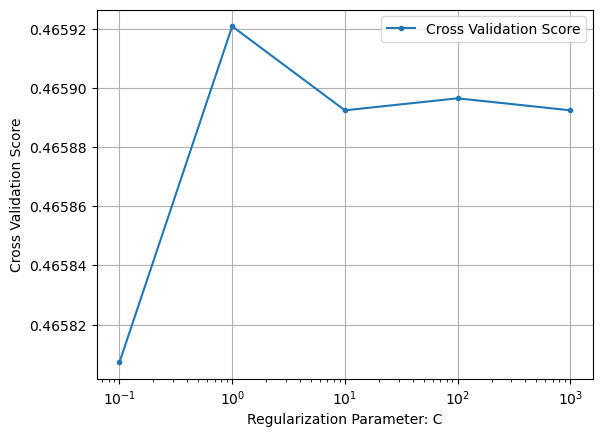

In [20]:
#Store the results
cross_validation_scores = []

C_range = np.array([.1, 1,10,100,1000])

#Do some cross validation
for c in C_range:
    LR_model = LogisticRegression(penalty='l1', C=c, solver='saga')
    
    # the cross validation score (mean of scores from all folds)
    cv_score = np.mean(cross_val_score(LR_model, X_train_scaled, y_train, cv = 5))
    
    # pring average cross-validation accuracy for each iteration of C
    print(cv_score)
    
    cross_validation_scores.append(cv_score)

plt.figure()
plt.plot(C_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.grid()
plt.show();

### Now lets add these hyperparamteres to our final log reg model and test for score accuracy

In [22]:
# Initialize the logistic regression model
logreg = LogisticRegression(penalty='l1', C=1, solver='saga', max_iter=200)

# Train the model
logreg.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test_scaled)

# Access the number of iterations
num_iteratibons = logreg.n_iter_
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print("Accuracy:", accuracy)
# Print the number of iterations
print("Number of Iterations:", num_iterations)

C:\Users\three\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy: 0.4657507583007575
Number of Iterations: [200]


In [54]:
# Get the class names
class_names = logreg.classes_

# Get the coefficients and feature names
coefficients = logreg.coef_
feature_names = X.columns

# Create a DataFrame to store the results
result_df = pd.DataFrame(columns=['Class', 'Feature', 'Coefficient'])

# Populate the DataFrame with the class names, top features, and coefficients
for class_idx, class_coef in enumerate(coefficients):
    top_features = sorted(zip(class_coef, feature_names), reverse=True)[:10]
    df = pd.DataFrame({'Class': class_names[class_idx], 'Feature': [feature for _, feature in top_features], 'Coefficient': [coef for coef, _ in top_features]})
    result_df = pd.concat([result_df, df], ignore_index=True)

# Print the result DataFrame
print("Top Features for Each Class:")
result_df

Top Features for Each Class:


Class                                    Feature  Coefficient
0    Long Delay   PRECIPITATION_DEPARTING_AIRPORT_RELATIVE     0.111659
1    Long Delay                                    MONTH_6     0.103393
2    Long Delay                                       PRCP     0.087743
3    Long Delay                                    MONTH_7     0.086356
4    Long Delay                                       SNOW     0.077962
5    Long Delay                      PREVIOUS_AIRPORT_NONE     0.070868
6    Long Delay                     DEP_TIME_BLK_2000-2059     0.068904
7    Long Delay                     DEP_TIME_BLK_1900-1959     0.067495
8    Long Delay                     DEP_TIME_BLK_1800-1859     0.064675
9    Long Delay                                    MONTH_8     0.054630
10  Minor Delay                            NUMBER_OF_SEATS     0.115957
11  Minor Delay        CARRIER_NAME_Southwest Airlines Co.     0.065149
12  Minor Delay                                   DISTANCE     0.054243
13  Minor Delay                         CONCURRENT_FLIGHTS     0.043375
14  Minor Delay              AIRLINE_AIRPORT_FLIGHTS_MONTH     0.039973
15  Minor Delay        CARRIER_NAME_American Airlines Inc.     0.031694
16  Minor Delay  CARRIER_NAME_American Eagle Airlines Inc.     0.028773
17  Minor Delay                   AVG_MONTHLY_PASS_AIRLINE     0.026147
18  Minor Delay                     DEP_TIME_BLK_0600-0659     0.019417
19  Minor Delay                                       PRCP     0.018232
20     No Delay                                       TMAX     0.139055
21     No Delay                     DEP_TIME_BLK_0700-0759     0.109625
22     No Delay                     DEP_TIME_BLK_0800-0859     0.103974
23     No Delay          CARRIER_NAME_Delta Air Lines Inc.     0.089839
24     No Delay                     DEP_TIME_BLK_0600-0659     0.088538
25     No Delay                                   MONTH_11     0.083778
26     No Delay                                    MONTH_1     0.073157
27     No Delay                     DEP_TIME_BLK_0900-0959     0.060900
28     No Delay                     DEP_TIME_BLK_0001-0559     0.053456
29     No Delay                     DEP_TIME_BLK_1000-1059     0.048164

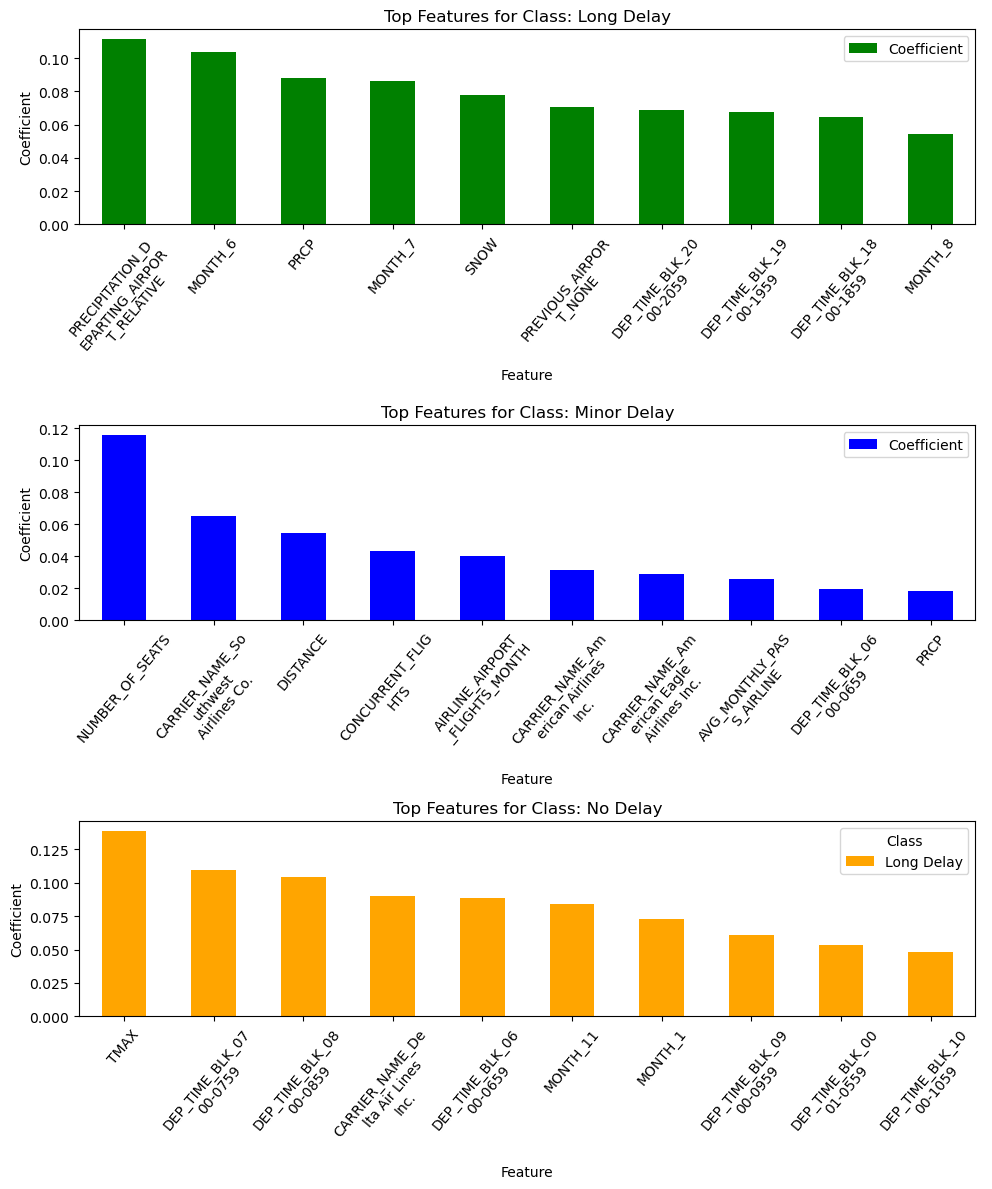

In [55]:
import textwrap

# Get unique class names and assign different colors
class_names = result_df['Class'].unique()
colors = ['green', 'blue', 'orange']

# Create subplots for each class with a smaller figsize
fig, axes = plt.subplots(len(class_names), figsize=(10, 4 * len(class_names)))

# Plot the DataFrame for each class
for i, class_name in enumerate(class_names):
    ax = axes[i]
    class_df = result_df[result_df['Class'] == class_name].copy()  # Make a copy of the DataFrame
    class_df['Wrapped Feature'] = class_df['Feature'].apply(lambda x: '\n'.join(textwrap.wrap(x, width=15)))  # Wrap long column names in the copied DataFrame
    class_df.plot.bar(x='Wrapped Feature', y='Coefficient', ax=ax, color=colors[i % len(colors)])
    ax.set_title(f'Top Features for Class: {class_name}')
    ax.set_xlabel('Feature', fontsize=10)
    ax.set_ylabel('Coefficient')
    ax.tick_params(axis='x', labelrotation=50)  # Rotate x-labels by 50 degrees

# Adjust spacing between subplots
plt.tight_layout()

# Add class names to the legend
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles, class_names, title='Class')

# Display the plot
plt.show()

# Decision Tree Classification

In [48]:
# DecisionTreeClassifier with the tested parameters
dt_model = DecisionTreeClassifier(max_depth=3)

# Perform cross-validation and compute the mean accuracy
cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)
mean_accuracy = cv_scores.mean()

# Print the cross-validation scores and mean accuracy
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", mean_accuracy)

Cross-Validation Scores: [0.42444395 0.42109852 0.42191809 0.42422952 0.41989051]
Mean Accuracy: 0.4223161170216273


In [50]:
# joblib.dump(gb_classifier, 'dt_model.joblib')

In [49]:
# # Make predictions on the test set
# y_pred = dt_model.predict(X_test)

# # Create the classification report
# report = classification_report(y_test, y_pred)

0.440973704825562
0.45525583276531967
0.4598097128181565
0.46312681157400554
0.45996382529248414
0.4518454984463548


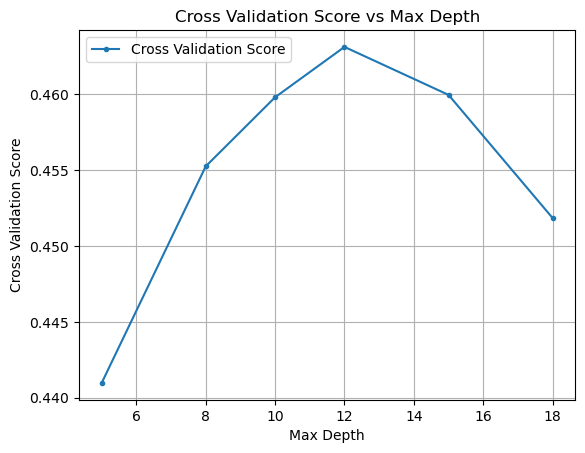

In [56]:
max_depths = [5, 8, 10, 12, 15, 18]
cross_validation_scores = []

# Loop through different max_depth values
for depth in max_depths:
    
    dt_model = DecisionTreeClassifier(max_depth=depth)
    cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)
    
    mean_accuracy = cv_scores.mean()
    cross_validation_scores.append(mean_accuracy)
    
    # pring average cross-validation accuracy for each iteration of C
    print(mean_accuracy)

# Plot the cross-validation scores
plt.figure()
plt.plot(max_depths, cross_validation_scores, label="Cross Validation Score", marker='.')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Cross Validation Score')
plt.title('Cross Validation Score vs Max Depth')
plt.grid()
plt.show()

#### Above we see a maximum depth of 12 yields the highest accuracy

0.4598218781038391
0.46282267416989054
0.4630457084909749
0.46343095029363307
0.4620724866230038


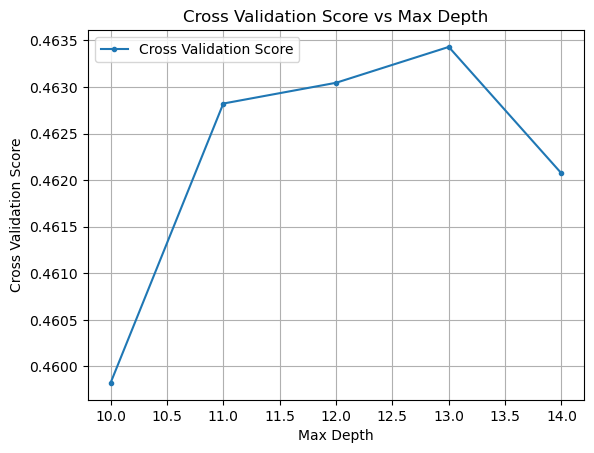

In [57]:
max_depths = [10, 11, 12, 13, 14]
cross_validation_scores = []

# Loop through different max_depth values
for depth in max_depths:
    
    dt_model = DecisionTreeClassifier(max_depth=depth)
    cv_scores = cross_val_score(dt_model, X_train_scaled, y_train, cv=5)
    
    mean_accuracy = cv_scores.mean()
    cross_validation_scores.append(mean_accuracy)
    
    # pring average cross-validation accuracy for each iteration of C
    print(mean_accuracy)

# Plot the cross-validation scores
plt.figure()
plt.plot(max_depths, cross_validation_scores, label="Cross Validation Score", marker='.')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Cross Validation Score')
plt.title('Cross Validation Score vs Max Depth')
plt.grid()
plt.show()

#### Now we see that 13 as max depth supports even higher model accuracy 

we will look at tuining the max feature parameter now below

Now lets try again , but for larger feature counts, and looking as well and percision and recall!

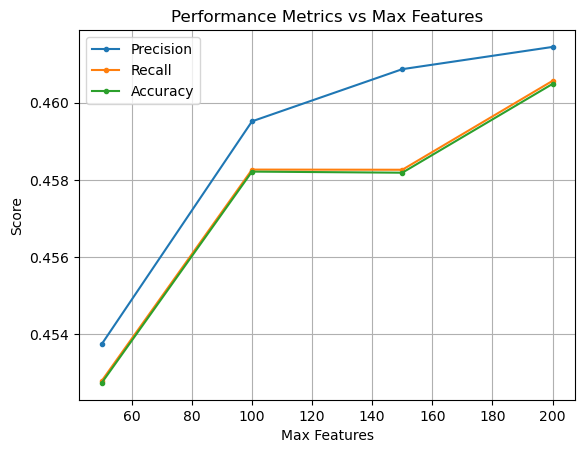

In [65]:
max_features_values = [50, 100, 150, 200, 250]
cross_val_accuracy = []
cross_val_precision = []
cross_val_recall = []

for max_features in max_features_values:
    dt_model = DecisionTreeClassifier(max_depth=11, max_features=max_features)
    
    # Perform cross-validation
    cv_results = cross_validate(dt_model, X_train_scaled, y_train, cv=5, scoring=['accuracy', 'precision_macro', 'recall_macro'])
    
    # Get the mean accuracy, precision, and recall across the cross-validation folds
    cross_val_mean_accuracy = np.mean(cv_results['test_accuracy'])
    cross_val_mean_precision = np.mean(cv_results['test_precision_macro'])
    cross_val_mean_recall = np.mean(cv_results['test_recall_macro'])
    
    # Append the cross-validation scores and performance metrics
    cross_val_accuracy.append(cross_val_mean_accuracy)
    cross_val_precision.append(cross_val_mean_precision)
    cross_val_recall.append(cross_val_mean_recall)

# Plot the changes in accuracy over each max_features iteration
plt.figure()
plt.plot(max_features_values, cross_val_accuracy, label="Accuracy", marker='.')
plt.xlabel('Max Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Max Features')
plt.grid()
plt.show()

# Plot the changes in precision and recall over each max_features iteration
plt.figure()
plt.plot(max_features_values, cross_val_precision, label="Precision", marker='.')
plt.plot(max_features_values, cross_val_recall, label="Recall", marker='.')
plt.xlabel('Max Features')
plt.ylabel('Score')
plt.title('Precision and Recall vs Max Features')
plt.legend()
plt.grid()
plt.show()

The above shows, logically, that as we increase the features (max_features) all of the three scores increase for the validation set

## Optimized model on test set

In [18]:
# DecisionTreeClassifier with the tested parameters
dt_model = DecisionTreeClassifier(max_depth=13)

# Train the model
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = dt_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.4677296394219072


In [19]:
# Visualize the decision tree
from graphviz import Source
from IPython.display import SVG

graph = Source( tree.export_graphviz(dt_model, out_file=None, feature_names=X.columns))
SVG(graph.pipe(format='svg'))


(process:13988): GLib-GIO-WARNING **: 14:28:26.718: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.6.2.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


In [24]:
# Get the feature importances from the decision tree model
importances = dt_model.feature_importances_

# Get the feature names
feature_names = X.columns

# Create a DataFrame to store the feature importances
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Take the top 20 features
top_20_features = feature_imp_df.head(20)

# Print the top 20 features with their Gini impurity scores
print("Top 20 Features by Gini Impurity:")
top_20_features

Top 20 Features by Gini Impurity:


Feature  Importance
20  PRECIPITATION_DEPARTING_AIRPORT_RELATIVE    0.125289
3                            NUMBER_OF_SEATS    0.118565
1                             SEGMENT_NUMBER    0.063192
0                                   DISTANCE    0.060133
17                                      TMAX    0.055501
2                         CONCURRENT_FLIGHTS    0.047729
18                                      AWND    0.045213
6              AIRLINE_AIRPORT_FLIGHTS_MONTH    0.042187
9                    FLT_ATTENDANTS_PER_PASS    0.033976
11                                 PLANE_AGE    0.029696
5                      AIRLINE_FLIGHTS_MONTH    0.029536
4                      AIRPORT_FLIGHTS_MONTH    0.029299
15                                      SNOW    0.019690
57                    DEP_TIME_BLK_2200-2259    0.018723
14                                      PRCP    0.016284
43                    DEP_TIME_BLK_0800-0859    0.015212
42                    DEP_TIME_BLK_0700-0759    0.013867
41                    DEP_TIME_BLK_0600-0659    0.010619
13                                 LONGITUDE    0.010295
55                    DEP_TIME_BLK_2000-2059    0.008454

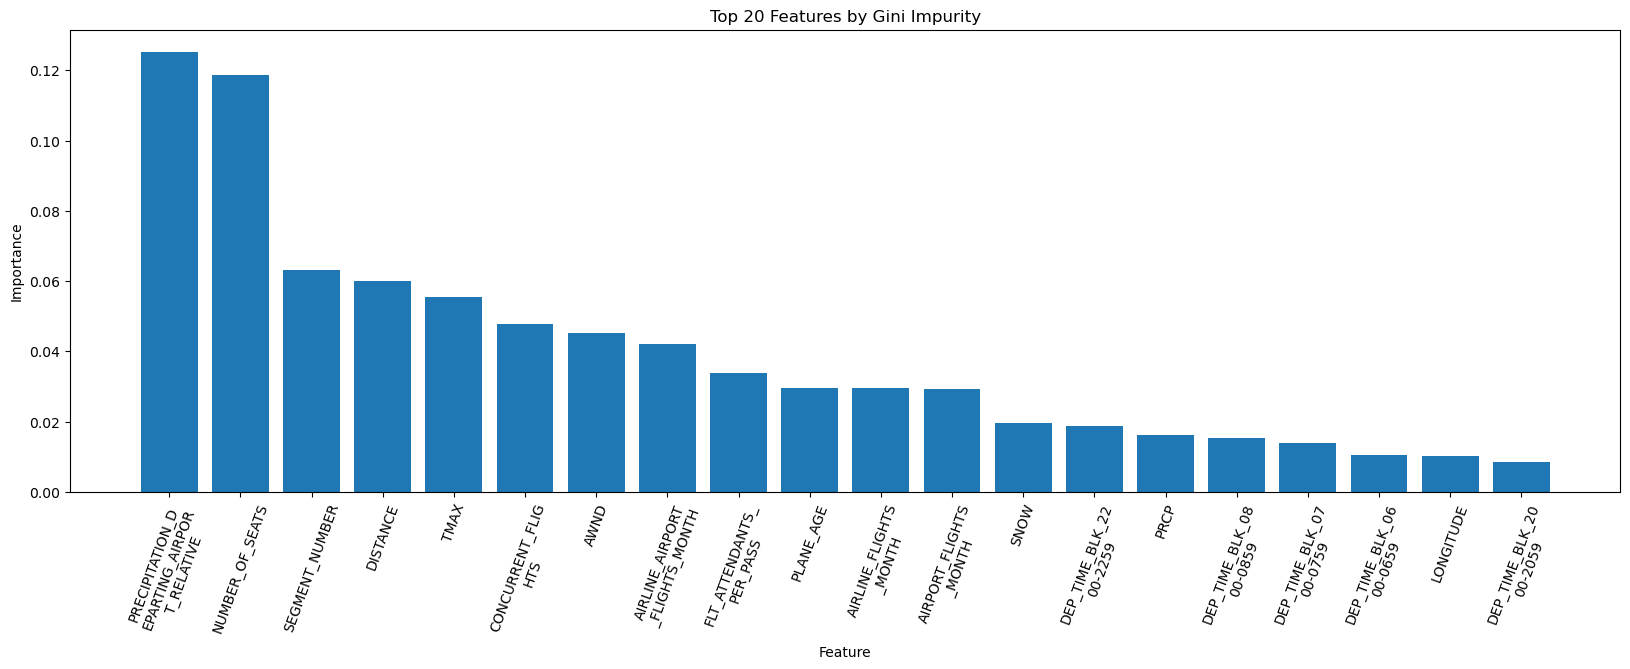

In [35]:
import textwrap

plt.figure(figsize=(20, 6))

# Wrap long words in the feature names to two lines
wrapped_feature_names = [textwrap.fill(feature, 15) for feature in top_20_features['Feature']]

# Plot the top 20 features
plt.bar(wrapped_feature_names, top_20_features['Importance'])

# Set the x-axis labels to be rotated for better readability
plt.xticks(rotation=70)

# Set the labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 20 Features by Gini Impurity')

# Show the plot
plt.show()

## PCA Analysis of Varience

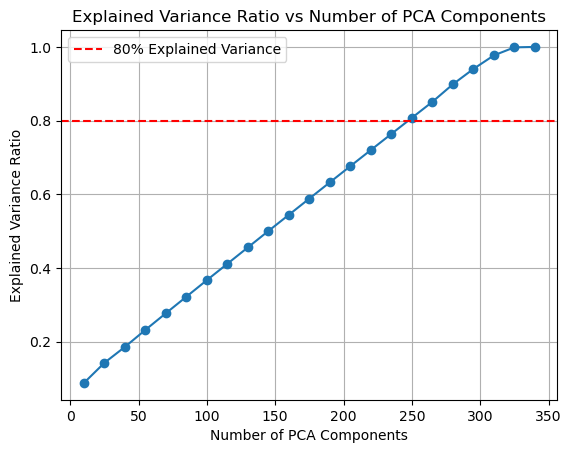

In [18]:
# Define the range of PCA components
n_components_values = range(10, X_train_scaled.shape[1] + 1, 15)
explained_variance_ratios = []

for n_components in n_components_values:
    # Apply PCA to the dataset
    pca = PCA(n_components=n_components)
    pca.fit(X_train_scaled)
    
    # Get the explained variance ratio
    explained_variance_ratio = np.sum(pca.explained_variance_ratio_)
    explained_variance_ratios.append(explained_variance_ratio)

plt.figure()
plt.plot(n_components_values, explained_variance_ratios, marker='o')
plt.axhline(y=0.8, color='r', linestyle='--', label='80% Explained Variance')
plt.xlabel('Number of PCA Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs Number of PCA Components')
plt.legend()
plt.grid()
plt.show()

# Random Forest Classification

In [99]:
# Create an instance of the Random Forest classifier with a random state of 30
rf_model = RandomForestClassifier(random_state=30)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test_scaled)

# Get the unique class names
class_names = label_encoder.classes_

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix with labels
confusion_mat = confusion_matrix(y_test, y_pred, labels=class_names)
print("Confusion Matrix:")
print(pd.DataFrame(confusion_mat, index=class_names, columns=class_names))



# Calculate recall score using numerical format
recall = recall_score(y_test_numeric, y_pred_numeric, average='weighted')
print("Recall Score:", recall)

Accuracy: 0.48424194254756614
Confusion Matrix:
             Long Delay  Minor Delay  No Delay
Long Delay        10337         5687      4495
Minor Delay        5683         8506      6263
No Delay           3825         5844     11011
Recall Score: 0.4844690272663866


In [131]:
# Calculate recall score specifically for the 'Long Delay' class
recall_long_delay = recall_score(y_test, y_pred, average=None, labels=['Long Delay'])
print("Recall Score for Class 'Long Delay':", recall_long_delay[0])

Recall Score for Class 'Long Delay': 0.5037769871826112


In [110]:
# Get the predicted probabilities for each class
y_pred_prob = rf_model.predict_proba(X_test_scaled)

# Get the class indices for the thresholds
threshold_indices = np.argmax(y_pred_prob, axis=1)

# Get the corresponding thresholds for each class
thresholds = [y_pred_prob[i, idx] for i, idx in enumerate(threshold_indices)]

# Print the class names and their corresponding thresholds
for class_name, threshold in zip(class_names, thresholds):
    print(f"Threshold for Class '{class_name}': {threshold}")

Threshold for Class 'Long Delay': 0.45
Threshold for Class 'Minor Delay': 0.4
Threshold for Class 'No Delay': 0.53


## Random Forest Hyperparameter Tuning

In [169]:
# Create an instance of the Random Forest classifier with a random state of 30
rf_model = RandomForestClassifier(random_state=30)

# Create a parameter grid to search for the best hyperparameters
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

# Create the HalvingGridSearchCV object
halving_cv = HalvingGridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, min_resources="exhaust", factor=3, random_state=30)

# Perform the grid search on the training data
halving_cv.fit(X_train_scaled, y_train_encoded)

# Get the best hyperparameters
best_params = halving_cv.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


As we can see, with some simple testing using HalvingGridSearchCV, the optimal paramters found so far are listed above.
Lets try again with some additional hyperparamters!

In [172]:
# Create an instance of the Random Forest classifier with a random state of 30
rf_model = RandomForestClassifier(random_state=30)

# Create a parameter grid to search for the best hyperparameters
param_grid = {
    'n_estimators': [50, 150, 200],
    'max_depth': [None],
    'min_samples_split': [5, 8],
    'min_samples_leaf': [2, 3],
    'max_features': ['sqrt', 'log2', None]
}

# Create the HalvingGridSearchCV object
halving_cv = HalvingGridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, min_resources="exhaust", factor=3, random_state=30)

# Perform the grid search on the training data
halving_cv.fit(X_train_scaled, y_train_encoded)

# Get the best hyperparameters
best_params = halving_cv.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 200}


Here the 'min_samples_leaf' changes to 3, so we will update this parameter for our next step.

## Adjusting Decision Tree Class Thresholds

By adjusting the decision threshold, you are essentially changing the cutoff value for classifying each sample into a particular class. This means that you are not changing the model itself or retraining it on the data. Instead, you are simply making a decision based on the probabilities obtained from the existing model.

Therefore, you can directly adjust the decision threshold and calculate accuracy and precision without the need to refit the entire model. This approach is efficient and computationally less expensive than retraining the model for each threshold value.

We can calculate the recall score manually for the 'Long Delay' class by using binary comparison.

In [180]:
# Create an instance of the Random Forest classifier with the best hyperparameters
rf_model = RandomForestClassifier(
    random_state=30,
    n_estimators=200,
    max_depth=None,
    max_features='sqrt',
    min_samples_leaf=3,
    min_samples_split=5
)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get the unique class names
class_names = np.unique(y_train)

In [181]:
# Get the predicted probabilities for each class
y_pred_prob = rf_model.predict_proba(X_test_scaled)

# Get the class indices for the thresholds
threshold_indices = np.argmax(y_pred_prob, axis=1)

# Get the corresponding thresholds for each class
thresholds = [y_pred_prob[i, idx] for i, idx in enumerate(threshold_indices)]

# Print the class names and their corresponding thresholds
for class_name, threshold in zip(class_names, thresholds):
    print(f"Threshold for Class '{class_name}': {threshold}")

Threshold for Class 'Long Delay': 0.4044586417098225
Threshold for Class 'Minor Delay': 0.34342549740394984
Threshold for Class 'No Delay': 0.5242486112281757


In [182]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix with labels
confusion_mat = confusion_matrix(y_test, y_pred, labels=class_names)
print("Confusion Matrix:")
print(pd.DataFrame(confusion_mat, index=class_names, columns=class_names))

# Calculate recall score specifically for the 'Long Delay' class
recall_long_delay = recall_score(y_test, y_pred, average=None, labels=['Long Delay'])
print("Recall Score for Class 'Long Delay':", recall_long_delay[0])

Accuracy: 0.48424194254756614
Confusion Matrix:
             Long Delay  Minor Delay  No Delay
Long Delay        10337         5687      4495
Minor Delay        5683         8506      6263
No Delay           3825         5844     11011
Recall Score for Class 'Long Delay': 0.5037769871826112


The matrix and percision scores above indicate that the new hyperparamters provide the exact same accuracy as the base model

Threshold: 0.2000
Recall of Long Delay: 0.9394
Sum of Other Class Recall: 0.2512
Sum All Class Recalls: 1.1906

Threshold: 0.2500
Recall of Long Delay: 0.8546
Sum of Other Class Recall: 0.4758
Sum All Class Recalls: 1.3304

Threshold: 0.3000
Recall of Long Delay: 0.7361
Sum of Other Class Recall: 0.6994
Sum All Class Recalls: 1.4356

Threshold: 0.3500
Recall of Long Delay: 0.5928
Sum of Other Class Recall: 0.8921
Sum All Class Recalls: 1.4849

Threshold: 0.4000
Recall of Long Delay: 0.4514
Sum of Other Class Recall: 1.0219
Sum All Class Recalls: 1.4733

Threshold: 0.4500
Recall of Long Delay: 0.3281
Sum of Other Class Recall: 1.0976
Sum All Class Recalls: 1.4257

Threshold: 0.5000
Recall of Long Delay: 0.2320
Sum of Other Class Recall: 1.1386
Sum All Class Recalls: 1.3705

Threshold: 0.5500
Recall of Long Delay: 0.1639
Sum of Other Class Recall: 1.1547
Sum All Class Recalls: 1.3187

Threshold: 0.6000
Recall of Long Delay: 0.1121
Sum of Other Class Recall: 1.1627
Sum All Class Recalls: 

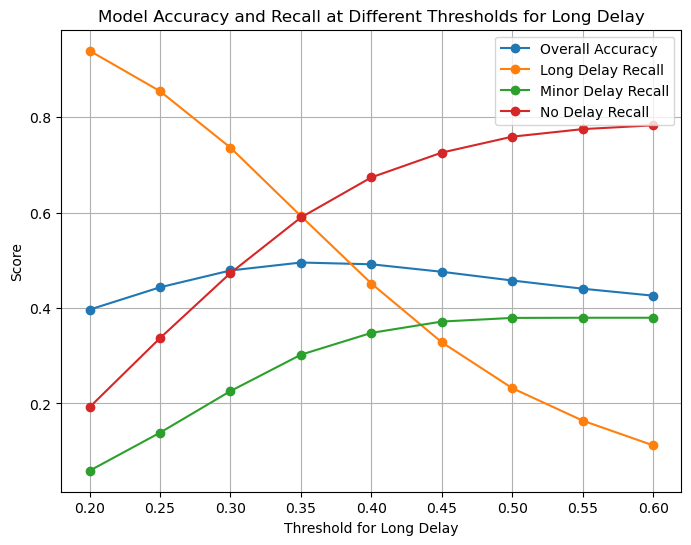

In [175]:
# Initialize lists to store accuracy and recall results for each threshold
thresholds_long_delay = np.arange(0.2, 0.65, 0.05)  # Adjust the range of thresholds for 'Long Delay'
threshold_minor_delay = 0.34  # Threshold for 'Minor Delay'
threshold_no_delay = 0.52  # Threshold for 'No Delay'

accuracies = []
recall_long_delay_scores = []
recall_minor_delay_scores = []
recall_no_delay_scores = []



# Loop through each threshold value for 'Long Delay'
for threshold_long_delay in thresholds_long_delay:
    # Adjust the decision thresholds for each class
    y_pred_prob = rf_model.predict_proba(X_test_scaled)
    y_pred_adjusted_labels = [
        class_names[0] if prob[0] >= threshold_long_delay 
        else class_names[2] if prob[2] >= threshold_no_delay 
        else class_names[1] if prob[1] >= threshold_minor_delay
        else class_names[2]  # Default to 'No Delay' class if none of the above conditions are met
        for prob in y_pred_prob
    ]

    # Calculate accuracy with adjusted threshold
    accuracy_adjusted = accuracy_score(y_test, y_pred_adjusted_labels)
    accuracies.append(accuracy_adjusted)

    # Calculate recall scores specifically for each class with adjusted threshold
    true_labels = label_encoder.transform(y_test)
    predicted_labels = label_encoder.transform(y_pred_adjusted_labels)
    recall_scores = recall_score(true_labels, predicted_labels, average=None)

    # Store recall scores for each class
    recall_long_delay_scores.append(recall_scores[0])
    recall_minor_delay_scores.append(recall_scores[1])
    recall_no_delay_scores.append(recall_scores[2])
    
    # Print Recall of Long Delay vs the sum of other class recall scores
    recall_minor_no_delay = recall_scores[1] + recall_scores[2]
    recall_long_delay = recall_scores[0]
    sum_recall = recall_minor_no_delay + recall_long_delay
    print(f"Threshold: {threshold_long_delay:.4f}")
    print(f"Recall of Long Delay: {recall_long_delay:.4f}")
    print(f"Sum of Other Class Recall: {recall_minor_no_delay:.4f}")
    print(f"Sum All Class Recalls: {sum_recall:.4f}")
    print()

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(thresholds_long_delay, accuracies, marker='o', label='Overall Accuracy')
plt.plot(thresholds_long_delay, recall_long_delay_scores, marker='o', label='Long Delay Recall')
plt.plot(thresholds_long_delay, recall_minor_delay_scores, marker='o', label='Minor Delay Recall')
plt.plot(thresholds_long_delay, recall_no_delay_scores, marker='o', label='No Delay Recall')
plt.xlabel('Threshold for Long Delay')
plt.ylabel('Score')
plt.title('Model Accuracy and Recall at Different Thresholds for Long Delay')
plt.legend()
plt.grid(True)
plt.show()

Fold 1
Fold 2
Fold 3


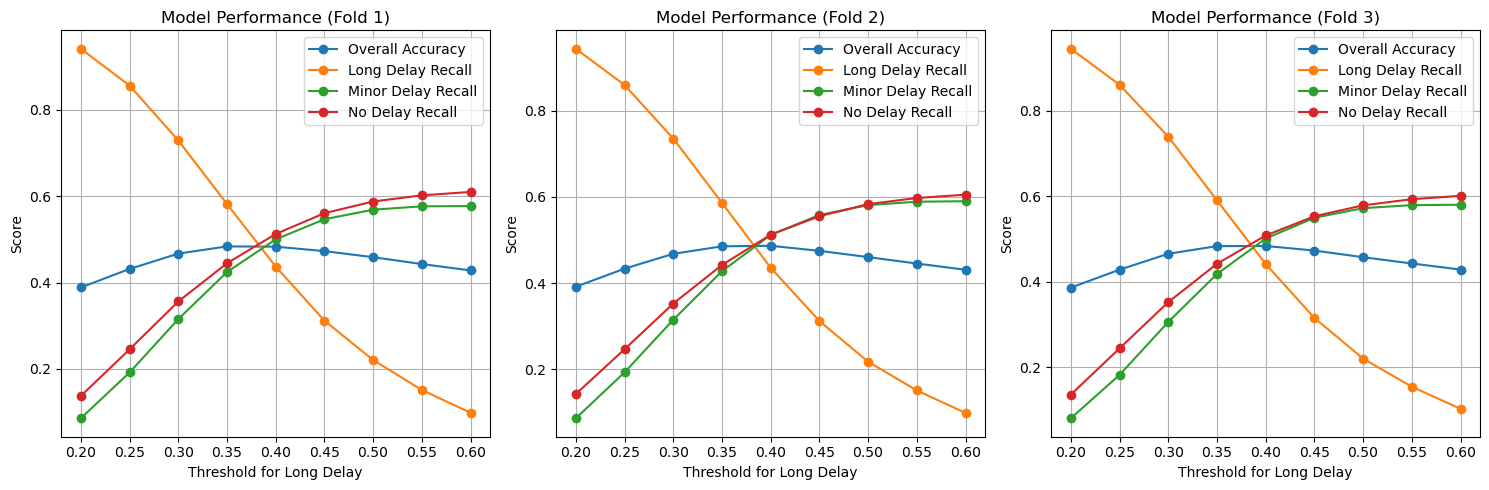

In [183]:
from sklearn.model_selection import KFold

# Convert y_train to a NumPy array
y_train_np = y_train.to_numpy()

# Create a 3-fold cross-validator
kf = KFold(n_splits=3, shuffle=True, random_state=30)

# Initialize lists to store accuracy and recall results for each threshold and fold
thresholds_long_delay = np.arange(0.2, 0.65, 0.05)  # Adjust the range of thresholds for 'Long Delay'
threshold_minor_delay = 0.34  # Threshold for 'Minor Delay'
threshold_no_delay = 0.52  # Threshold for 'No Delay'

# Create a figure with 3 subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Create a list to store the results for each fold
results_list = []

# Loop through each fold in the 3-fold cross-validation
for fold_idx, (train_idx, val_idx) in enumerate(kf.split(X_train_scaled)):
    print(f"Fold {fold_idx + 1}")
    
    # Split the data into training and validation sets for this fold
    X_train_fold, X_val_fold = X_train_scaled[train_idx], X_train_scaled[val_idx]
    y_train_fold, y_val_fold = y_train_np[train_idx], y_train_np[val_idx]
    
    # Create an instance of the Random Forest classifier with the best hyperparameters
    rf_model = RandomForestClassifier(
        random_state=30,
        n_estimators=200,
        max_depth=None,
        max_features='sqrt',
        min_samples_leaf=3,
        min_samples_split=5
    )

    # Train the model on the training data for this fold
    rf_model.fit(X_train_fold, y_train_fold)

    # Get the unique class names
    class_names = np.unique(y_train_np)
    
    # Initialize lists to store accuracy and recall results for each threshold for this fold
    accuracies = []
    recall_long_delay_scores = []
    recall_minor_delay_scores = []
    recall_no_delay_scores = []

    # Loop through each threshold value for 'Long Delay' for this fold
    for threshold_long_delay in thresholds_long_delay:
        # Adjust the decision thresholds for each class for this fold
        y_pred_prob = rf_model.predict_proba(X_val_fold)
        y_pred_adjusted_labels = [
            class_names[0] if prob[0] >= threshold_long_delay 
            else class_names[2] if prob[2] >= threshold_no_delay 
            else class_names[1] if prob[1] >= threshold_minor_delay
            else class_names[2]  # Default to 'No Delay' class if none of the above conditions are met
            for prob in y_pred_prob
        ]

        # Calculate accuracy with adjusted threshold for this fold
        accuracy_adjusted = accuracy_score(y_val_fold, y_pred_adjusted_labels)
        accuracies.append(accuracy_adjusted)

        # Calculate recall scores specifically for each class with adjusted threshold for this fold
        true_labels = label_encoder.transform(y_val_fold)
        predicted_labels = label_encoder.transform(y_pred_adjusted_labels)
        recall_scores = recall_score(true_labels, predicted_labels, average=None)

        # Store recall scores for each class for this fold
        recall_long_delay_scores.append(recall_scores[0])
        recall_minor_delay_scores.append(recall_scores[1])
        recall_no_delay_scores.append(recall_scores[2])
        
        # Update the values for each fold and threshold
        recall_minor_no_delay = recall_scores[1] + recall_scores[2]
        recall_long_delay = recall_scores[0]
        sum_recall = recall_minor_no_delay + recall_long_delay
        
        # Append the results for this threshold and fold to the results_list
        results_list.append({
            'Fold': fold_idx + 1,
            'Threshold': threshold_long_delay,
            'Recall_Long_Delay': recall_long_delay,
            'Sum_Other_Class_Recall': recall_minor_no_delay,
            'Sum_All_Class_Recalls': sum_recall
        })

    # Plot the results for this fold in a subplot
    axes[fold_idx].plot(thresholds_long_delay, accuracies, marker='o', label='Overall Accuracy')
    axes[fold_idx].plot(thresholds_long_delay, recall_long_delay_scores, marker='o', label='Long Delay Recall')
    axes[fold_idx].plot(thresholds_long_delay, recall_minor_delay_scores, marker='o', label='Minor Delay Recall')
    axes[fold_idx].plot(thresholds_long_delay, recall_no_delay_scores, marker='o', label='No Delay Recall')
    axes[fold_idx].set_xlabel('Threshold for Long Delay')
    axes[fold_idx].set_ylabel('Score')
    axes[fold_idx].set_title(f'Model Performance (Fold {fold_idx + 1})')
    axes[fold_idx].legend()
    axes[fold_idx].grid(True)

plt.tight_layout()
plt.show()

In [184]:
# Create a DataFrame from the results_list
results_df = pd.DataFrame(results_list)

# Print the DataFrame containing the results for each fold and threshold
results_df

Fold  Threshold  Recall_Long_Delay  Sum_Other_Class_Recall  \
0      1       0.20           0.941804                0.222557   
1      1       0.25           0.856513                0.436881   
2      1       0.30           0.729415                0.671303   
3      1       0.35           0.582031                0.869044   
4      1       0.40           0.437052                1.012626   
5      1       0.45           0.311737                1.107479   
6      1       0.50           0.220474                1.156714   
7      1       0.55           0.150989                1.178812   
8      1       0.60           0.098183                1.187322   
9      2       0.20           0.944036                0.228335   
10     2       0.25           0.859816                0.439016   
11     2       0.30           0.735508                0.667244   
12     2       0.35           0.586076                0.869386   
13     2       0.40           0.435516                1.024280   
14     2       0.45           0.311717                1.113216   
15     2       0.50           0.217339                1.164330   
16     2       0.55           0.150524                1.186432   
17     2       0.60           0.098347                1.195271   
18     3       0.20           0.944377                0.216867   
19     3       0.25           0.860193                0.426373   
20     3       0.30           0.738841                0.658251   
21     3       0.35           0.590099                0.859814   
22     3       0.40           0.441210                1.008909   
23     3       0.45           0.315281                1.102294   
24     3       0.50           0.220147                1.150316   
25     3       0.55           0.154455                1.171741   
26     3       0.60           0.102860                1.180485   

    Sum_All_Class_Recalls  
0                1.164361  
1                1.293394  
2                1.400718  
3                1.451075  
4                1.449678  
5                1.419216  
6                1.377189  
7                1.329801  
8                1.285504  
9                1.172371  
10               1.298833  
11               1.402752  
12               1.455462  
13               1.459795  
14               1.424933  
15               1.381669  
16               1.336957  
17               1.293618  
18               1.161244  
19               1.286566  
20               1.397092  
21               1.449912  
22               1.450119  
23               1.417574  
24               1.370463  
25               1.326195  
26               1.283345

Above we are experimenting with various threholds of classification for 'Long delay'. We are aslo making sure to keep the threshold for class 'Minor Delay' (0.34) and threshold for class 'No Delay': (0.52). Here we can see as our threhold for long delay increases, our recall decreses. 

Ultimately we want a mix of high recall in the important class (long delays) and at the same time have a comparable amount of accuracy and recall in the other classes. At a threhold of 0.350, we can find a good middle ground between total percision, accuracy, and 'Long Delay' percision.